In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
credit=pd.read_csv("E:\\itsstudytym\\assignments\\LR\\creditcard LR.csv")
credit.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
credit=credit.drop('Unnamed: 0',axis=1)

In [5]:
credit.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

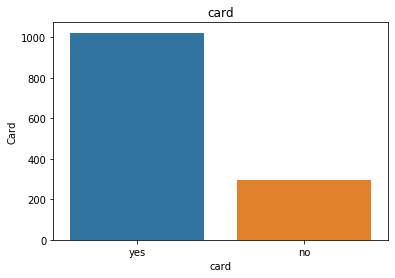

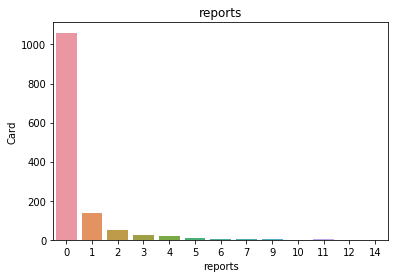

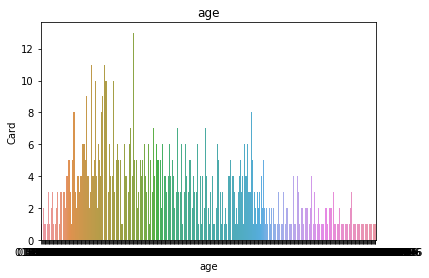

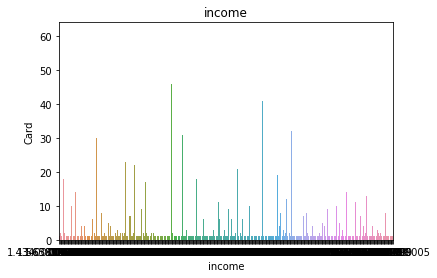

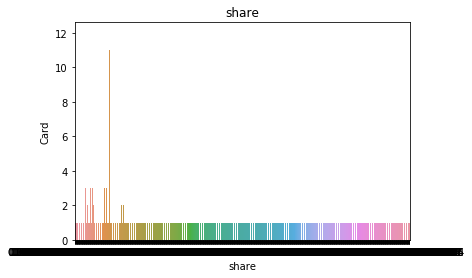

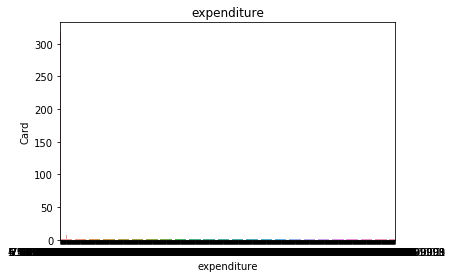

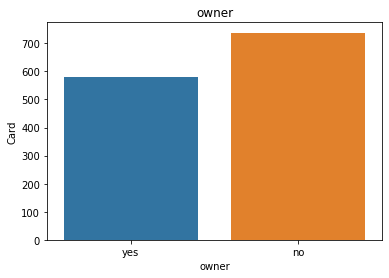

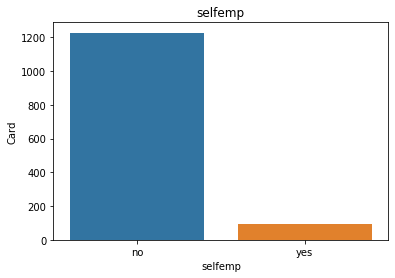

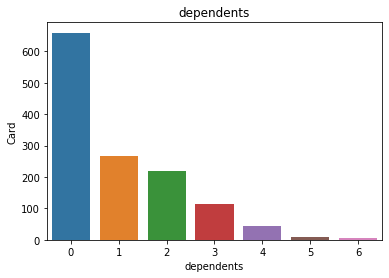

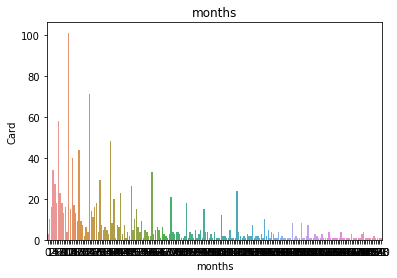

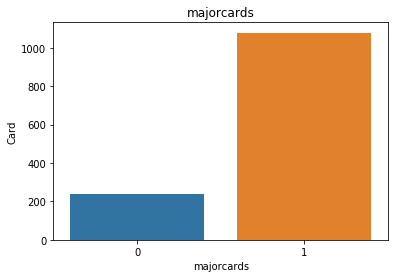

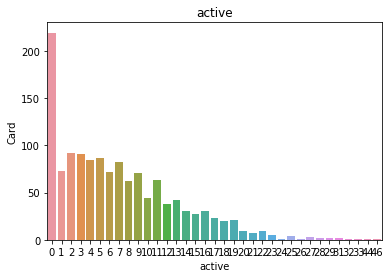

In [6]:
for feature in credit.columns:
    sbn.countplot(feature,data=credit)
    plt.xlabel(feature)
    plt.ylabel('Card')
    plt.title(feature)
    plt.show()

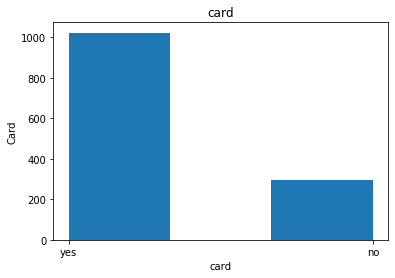

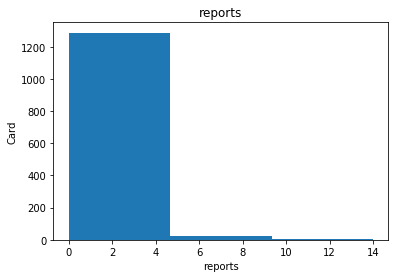

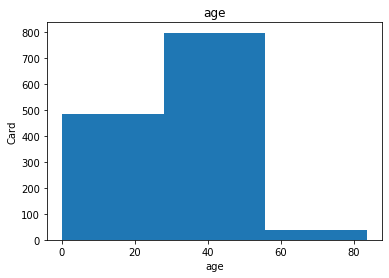

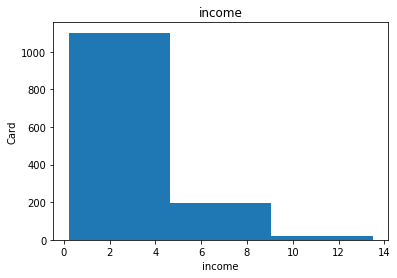

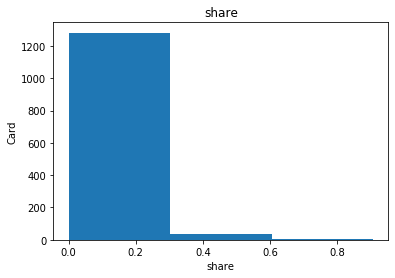

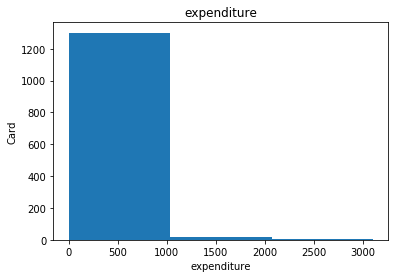

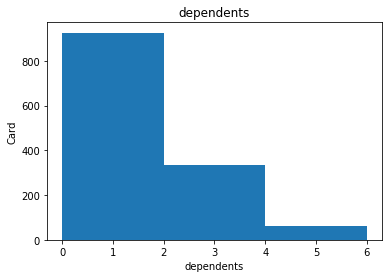

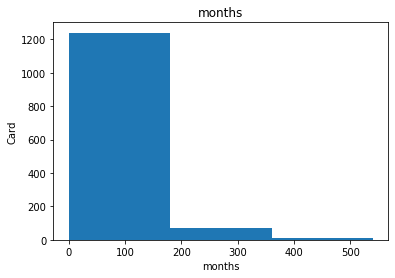

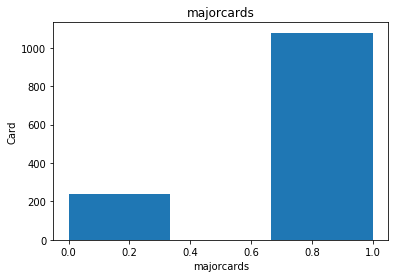

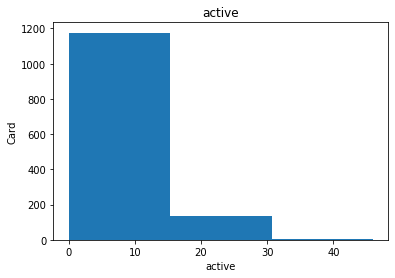

In [7]:
for feature in credit.columns:
    if feature!='owner' and feature!='selfemp':
        plt.hist(feature,data=credit,bins=3)
        plt.xlabel(feature)
        plt.ylabel('Card')
        plt.title(feature)
        plt.show()

In [8]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [9]:
credit['owner']=pd.get_dummies(credit['owner'],drop_first=True)
credit['selfemp']=pd.get_dummies(credit['selfemp'],drop_first=True)

In [10]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [11]:
X=credit.iloc[:,1:]
y=credit.iloc[:,:1]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=False)

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
LRM=LogisticRegression()

In [19]:
LRM.fit(X_train,y_train)

C:\Users\sonih\anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sonih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=LRM.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [23]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n          no       0.93      0.98      0.95        83\n         yes       0.99      0.98      0.99       313\n\n    accuracy                           0.98       396\n   macro avg       0.96      0.98      0.97       396\nweighted avg       0.98      0.98      0.98       396\n'

In [24]:
confusion_matrix(y_test,y_pred)

array([[ 81,   2],
       [  6, 307]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.9797979797979798